# **Installing and Importing the necessary libraries**

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

# Library to help with statistical analysis
import scipy.stats as stats

In [ ]:
  # Checking the versions of the imported libraries
  import scipy
  print(f"NumPy version: {np.__version__}")
  print(f"Pandas version: {pd.__version__}")
  print(f"Seaborn version: {sns.__version__}")
  print(f"SciPy version: {scipy.__version__}")

NumPy version: 2.0.2
Pandas version: 2.2.2
Seaborn version: 0.13.2
SciPy version: 1.16.3


# **Loading the dataset**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading Data Set into a pandas dataframe
enews=pd.read_csv('/content/drive/MyDrive/Python/abtest.csv')

In [ ]:
# Creating copy of the main data file.
enews_1=enews.copy()

# **Data Overview**

### Viewing the First 5 Rows and Last 5 Rows of the Data Set

In [ ]:
enews_1.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
enews_1.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


As displayed in Head and Tail Function,all the users are classified into 2 groups Control and Treatment, with their preferrences of the Language and Landing Page.

The time spent by a user on the landing page is also mentioned in minutes and whether are converted or not is provided.

In [ ]:
# Display the number of rows and columns in the datas
enews_1.shape

(100, 6)

As mentioned in the Problem Statement, Randomly 100 users are selected and are divided based on 6 features.

In [ ]:
# Display the column names of the dataset
enews_1.columns

Index(['user_id', 'group', 'landing_page', 'time_spent_on_the_page',
       'converted', 'language_preferred'],
      dtype='object')

Cross verification of the Features in Data Set with what is mentioned in Problem Statement. All the Features matches the Statement Features.

## Checking for the Attributes type

In [ ]:
# checking column datatypes and number of non-null values
enews_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


4 Features (Group, Landing Page, Converted and Language Preferred) are categorical variables and User Id & Time Spent on the Page are Integer and Float respectively.

Their are total 100 users with 0 null values, which means there are no missing values in the Data Set.

In [ ]:
# Checking for Numerical Attributes Summary
enews_1.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


Time Spent on the Page has a Mean of 5.3778 minutes with Std Deviation of 2.378 minutes.

Minimum time spent is 0.19 minutes and maximum is 10.71 minutes.

50% quartile/Median is 5.415 minutes which is very close to Mean, which suggest that the distribution will be almost Normal Distribution.

1st Quartile is 3.88 minutes while 3rd Quartile is 7.02 minutes.

In [ ]:
enews_1['language_preferred'].value_counts()

,count
language_preferred,
Spanish,34
French,34
English,32


In [ ]:
# Checking for Categorical Variables Summary
enews_1.describe(include='object').T

,count,unique,top,freq
group,100,2,control,50
landing_page,100,2,old,50
converted,100,2,yes,54
language_preferred,100,3,Spanish,34


1) In the Group Column their are 2 unique values (Control and Treatment) as mentioned in problem statement with users divided equally between the 2 groups.

2) Landing Page has also 2 unique values, Old and New with users divided equally between the two.

3) Converted also has 2 unique values Yes and No, with Yes having 54 users while No has 46 users.

4) Language Preferred has 3 unique Values, Spanish, English and French with Spanish and French having 34 users each and English is having 32 users.

In [ ]:
# Find the total number of unique values in 'time_spent_on_the_page'
total_unique_time_spent = enews_1['time_spent_on_the_page'].nunique()

# Print the result
print("Total number of unique values in 'time_spent_on_the_page':", total_unique_time_spent)

Total number of unique values in 'time_spent_on_the_page': 94


Total Unique Values in Time Spent Variable is 94 out of 100 readings.

In [ ]:
# checking for duplicate values
enews_1.duplicated().sum()

np.int64(0)

There are no duplicate values in the data set.

In [ ]:
# checking for missing values
enews_1.isnull().sum()

,0
user_id,0
group,0
landing_page,0
time_spent_on_the_page,0
converted,0
language_preferred,0


There are no missing values in the data set.

In [ ]:
# Displaying Unique values of the Categorical Attributes
categorical_columns = ['group','landing_page','converted','language_preferred']
for col in categorical_columns:
    print(f"Unique values in '{col}':")
    print(enews_1[col].value_counts())
    print("\n")

Unique values in 'group':
group
control      50
treatment    50
Name: count, dtype: int64


Unique values in 'landing_page':
landing_page
old    50
new    50
Name: count, dtype: int64


Unique values in 'converted':
converted
yes    54
no     46
Name: count, dtype: int64


Unique values in 'language_preferred':
language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64




All the Unique Values of Categorical variables are displayed above, with  their frequency of occurence in the Data Set.

# **Exploratory Data Analysis (EDA)**

### **Univariate Analysis**


#### **Performing Univariate Analysis of the Numerical Attributes**

Displaying Graph and Numerical Values for Time Spent on the Page.


In [ ]:
print(' The minimum time spent on the Landing Page',round(enews_1['time_spent_on_the_page'].min(), 2),'minutes'),
print('The maximum time spent on the landing Page',round(enews_1['time_spent_on_the_page'].max(), 2),'minutes'),
print('The mean time spent on the landing page',round(enews_1['time_spent_on_the_page'].mean(), 2),'minutes')

 The minimum time spent on the Landing Page 0.19 minutes
The maximum time spent on the landing Page 10.71 minutes
The mean time spent on the landing page 5.38 minutes


Minimum Time Spent on the Landing Page is 0.19 minutes.

Maximum Time Spent on the Landing Page is 10.71 minutes.

Mean time Spent on the Landing Page is 5.38 minutes.


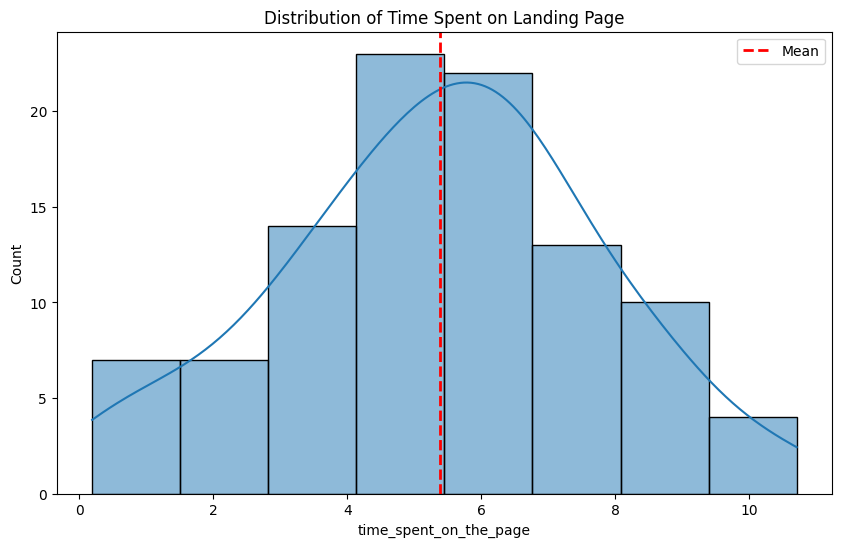

In [ ]:
# Plotting Histogram for showing Distribution of Time Spent on Landing Page.
plt.figure(figsize=(10,6))
sns.histplot(data=enews_1, x='time_spent_on_the_page', kde=True);
plt.axvline(enews_1['time_spent_on_the_page'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.title('Distribution of Time Spent on Landing Page')
plt.legend()
plt.show()

1) The above histogram displayed verify the assumption above made of Data being almost Normally Distributed.

2) Mean and Median are almost at the same point with a subtle variation.

3) Maximum user give time between 4-6 minutes on Landing Page.

4) User giving less than 1 minute are around 7 in numbers and users giving more than 10 minutes are around 3.

In [ ]:
# Group data by landing_page and calculate descriptive statistics for time_spent_on_the_page
time_spent_by_landing_page = enews_1.groupby('landing_page')['time_spent_on_the_page'].describe()

# Display the results
display(time_spent_by_landing_page)

,count,mean,std,min,25%,50%,75%,max
landing_page,,,,,,,,
new,50.0,6.2232,1.817031,1.65,5.175,6.105,7.1600,10.71
old,50.0,4.5324,2.581975,0.19,2.720,4.380,6.4425,10.30


1) Post seggregating the users who have spent time on new or old landing page the statistical summary  is generated.

2) Users who went for New Landing Page have mean time spent of 6.223 minutes in comparison to users who opted for old landing page which is 4.532 minutes.

3) The standard deviation is also higher in terms of Old Landing Page users which is 2.58 minutes compared to New Landing page users which is 1.81 minutes.

4) Minimum time spent on New Landing Page is 1.65 minutes which is higher than Old Landing Page which  is 0.19 minutes.

5) Maximum time spent on New and Old have slight difference 0f 0.41 minutes. New has 10.71 minutes while Old has 10.30 minutes.

6) 50% Quartile or Median in both cases are very close to Mean; 6.105 minutes for New and 4.38 minutes for Old Landinng Page.

7) Due to higher standard deviation in Old Landing Page 25% Quartile and 75% Quartile can see a variation of 3.7225 minutes whereas in case of New Landing Page it is 1.985 minutes which is almost half of Old Landing Page.

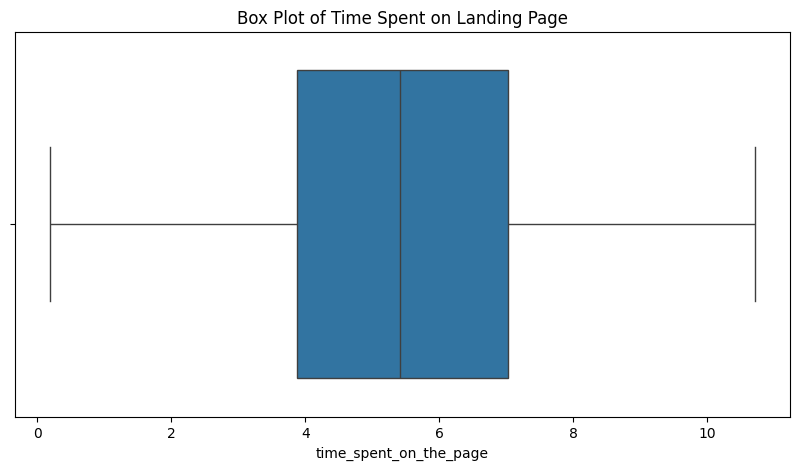

In [ ]:
# Box-plot showing the distribution of time spent on landing page
plt.figure(figsize = (10,5))
sns.boxplot(data=enews_1, x='time_spent_on_the_page')
plt.title('Box Plot of Time Spent on Landing Page')
plt.show()

1) It can be seen from the Box Plot the Mean and Median are almost same.

2) There are no outliers observed in the Data Set.

#### **Performing Univariate Analysis of Categorical Attributes**

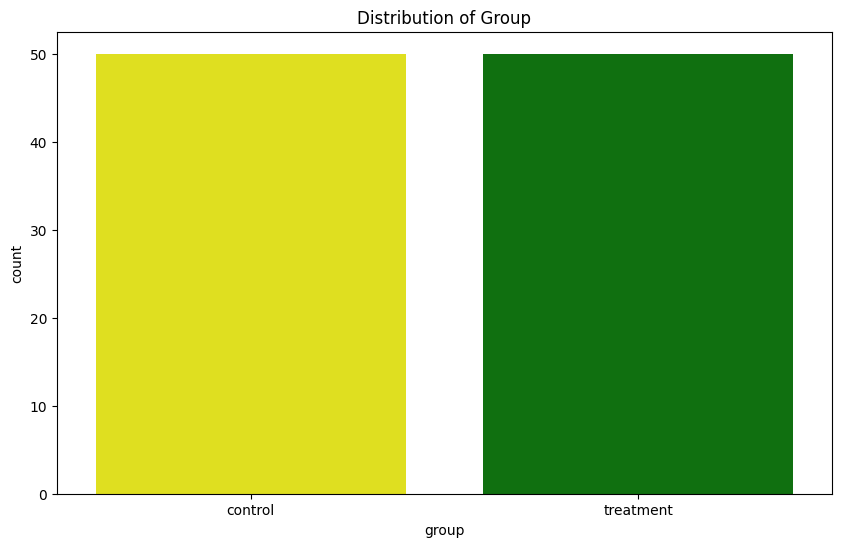

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=enews_1, x='group', hue='group', palette=['yellow','green'], legend=False)
plt.title('Distribution of Group')
plt.show()

The distribution of Groups are equal as the Data have been equally divided into both the groups. No subsequent information can be derived from the Graph.

In [ ]:
# Group data by group and calculate descriptive statistics for time_spent_on_the_page
time_spent_by_group = enews_1.groupby('group')['time_spent_on_the_page'].describe()

# Display the results
display(time_spent_by_group)

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
control,50.0,4.5324,2.581975,0.19,2.720,4.380,6.4425,10.30
treatment,50.0,6.2232,1.817031,1.65,5.175,6.105,7.1600,10.71


 After using the groupby function on Groups and Time Spent on Page no new information is achieved as Control Group is Group of users for Old Landing Page and Treatment Group is of users of New Landing Page.



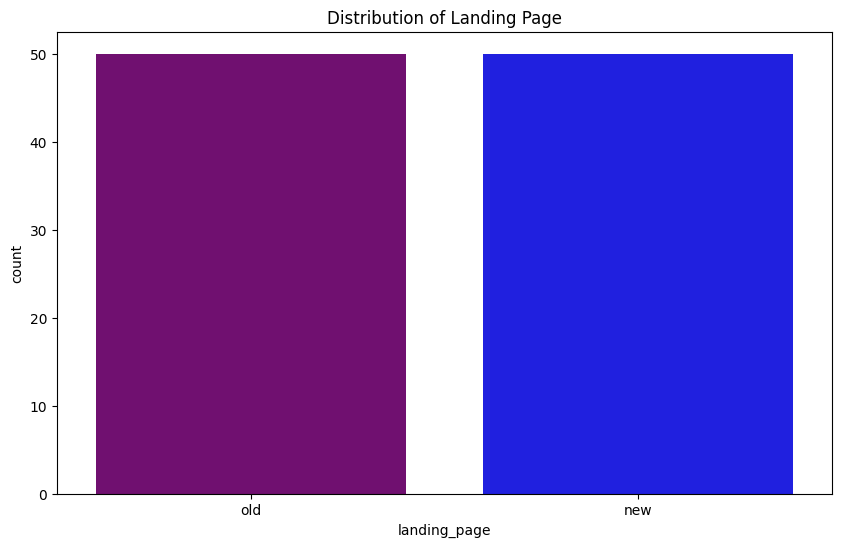

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=enews_1, x='landing_page', hue='landing_page', palette=['purple','blue'], legend=False)
plt.title('Distribution of Landing Page')
plt.show()

The Graph does not provide any insight as both the groups are equally divided which is displayed in graph.

In [ ]:
# Group data by group and calculate descriptive statistics for time_spent_on_the_page
time_spent_by_group = enews_1.groupby('landing_page')['time_spent_on_the_page'].describe()

# Display the results
display(time_spent_by_group)

,count,mean,std,min,25%,50%,75%,max
landing_page,,,,,,,,
new,50.0,6.2232,1.817031,1.65,5.175,6.105,7.1600,10.71
old,50.0,4.5324,2.581975,0.19,2.720,4.380,6.4425,10.30


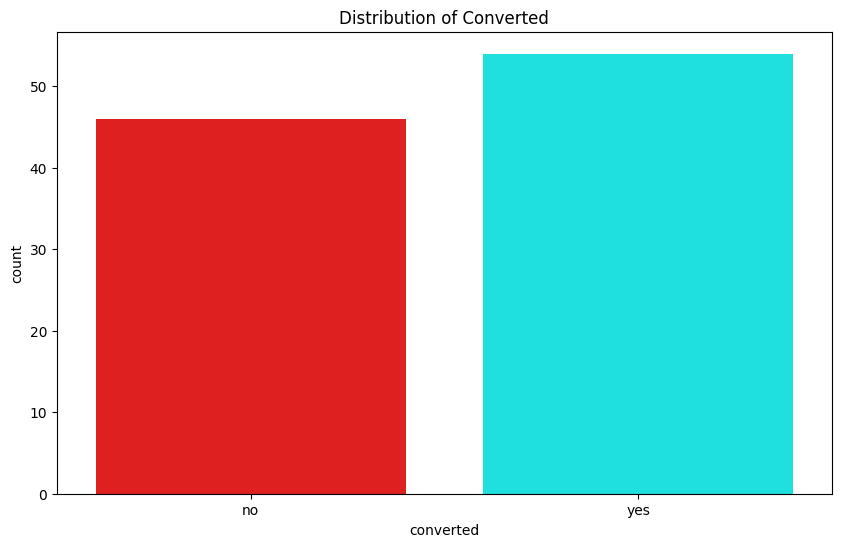

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=enews_1, x='converted', hue='converted', palette=['red', 'cyan'], legend=False)
plt.title('Distribution of Converted')
plt.show()

The Graph displays over 50 users got converted after visiting Landing Page and 45+ users were not converted.

In [ ]:
# Group data by group and calculate descriptive statistics for time_spent_on_the_page
time_spent_by_group = enews_1.groupby('converted')['time_spent_on_the_page'].describe()

# Display the results
display(time_spent_by_group)

,count,mean,std,min,25%,50%,75%,max
converted,,,,,,,,
no,46.0,3.915870,2.226897,0.19,2.3375,3.980,4.9225,9.15
yes,54.0,6.623148,1.708427,2.58,5.5000,6.495,7.3675,10.71


1) The Statistical summary is displayed when converted is grouped by time spent on landing page.

2) Mean time for converted users is 6.623 minutes which is higher than not converted users which is 3.915 minutes.

3) Standard Deviation is higher in case of non converted users to converted users. For non converted itnis 2.226 minutes whereas for converted it is 1.708 minutes.

4) The minimum time for non converted users is 0.19 minutes which is same for old landing page users and for converted it is 2.58 minutes, which is higher.

5) 50% Quartile/ Median is almost  same for both the category of converted or not converted. Median for converted is higher then not converted.

6) Maximum time for converted users is 10.71 minutes whereas for not converted is 9.15 minutes.

7) Due high Standard deviation the difference between 25%quartile and 75%quartile is 2.585 whereas for converted users it is 1.8675




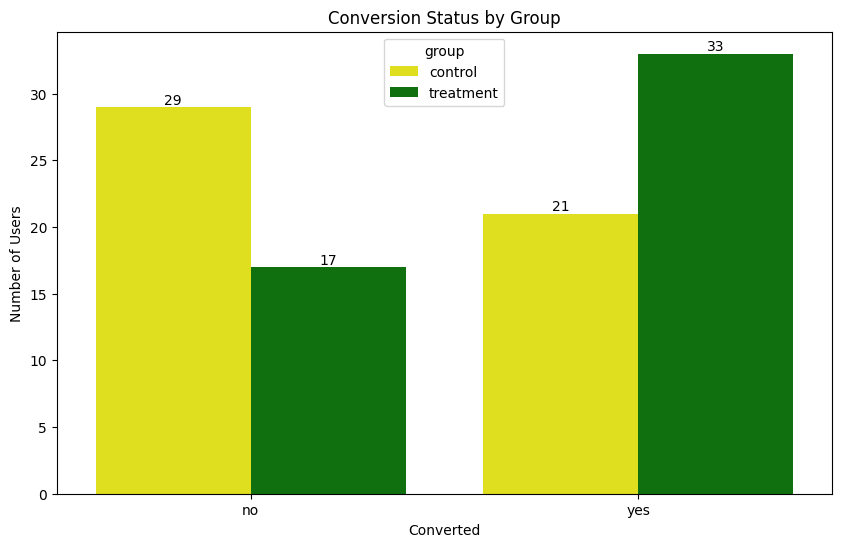

In [ ]:
# Create a count plot of converted status by group
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=enews_1, x='converted', hue='group', palette=['yellow', 'green'])
plt.title('Conversion Status by Group')
plt.xlabel('Converted')
plt.ylabel('Number of Users')

# Add counts on top of the bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()

1) The Graph provides detail for conversion of users from Old and New Landing Page.

2) Out of 50 users from Control/Old Landing Page Group 29 were not converted which is 58% of the total users.

3) Out of 50 users from Treatment/new Landing Page Group 33 got converted which  is 66%.

4) 17 users from Treatment Group were not converted and 21 users from Control Group were converted.

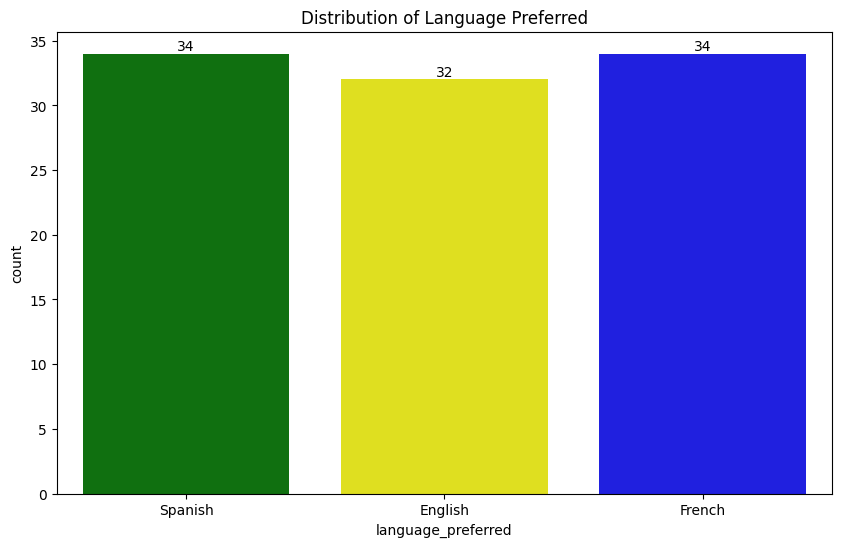

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=enews_1, x='language_preferred', hue='language_preferred', palette=['green', 'yellow', 'blue'], legend=False)
plt.title('Distribution of Language Preferred')

# Add counts on top of the bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()

1) The Graph display the language preference of 100 users distributed in 3 Languages, English, French and Spanish.

2) French and Spanish have 34 users and English has 32 users.

In [ ]:
# Group data by group and calculate descriptive statistics for time_spent_on_the_page
time_spent_by_group = enews_1.groupby('language_preferred')['time_spent_on_the_page'].describe()

# Display the results
display(time_spent_by_group)

,count,mean,std,min,25%,50%,75%,max
language_preferred,,,,,,,,
English,32.0,5.559062,2.621079,0.22,3.6175,5.755,7.1375,10.50
French,34.0,5.253235,2.675413,0.40,3.3950,5.315,7.3675,10.71
Spanish,34.0,5.331765,1.818095,0.19,4.4750,5.605,6.5150,8.72


1) When Language Preferred is grouped by time spent statistical summary for all the three languages are obtained.

2) Total users for English Language are 32, with mean time spending on landing page is 5.559 minutes.

3) Maximum time and minimum time are 10.50 minutes and 0.22 minutes. The standard deviation is 2.621 minutes with Median as 5.755 minutes close to mean time.

4) Due to higher standard deviation variation in 1st and 3rd quartile is also high which is 3.52 minutes, which is more than standard deviation.

5) For French Language user counts are 34, with mean time spent of 5.253 minutes lowest among all the three languages.

6)  Maximum time and minimum time are 10.71 minutes and 0.40 minutes. The standard deviation is 2.67 minutes with Median as 5.315 minutes close to mean time and slightly higher.

7) Due to higher standard deviation variation in 1st and 3rd quartile is also high which is 3.97 minutes, which is more than standard deviation.

8) For Spanish Language user counts are 34, with mean time spent of 5.331 minutes, lower than English Language.

9) Maximum time and minimum time are 8.72 minutes which is lowest in all three languages and 0.19 minutes, which is also minimum time for old landing page users. The standard deviation is 1.81 minutes with Median as 5.605 minutes close to mean time and slightly higher.

10) Among three languages with lowest standard deviation variation in 1st and 3rd quartile is also high which is 2.04 minutes, which is more than standard deviation.

### **Bivariate/Multivariate Analysis**

Time Spent on the page v/s Landing Page (Old v/s New) Hue as Language Preferred

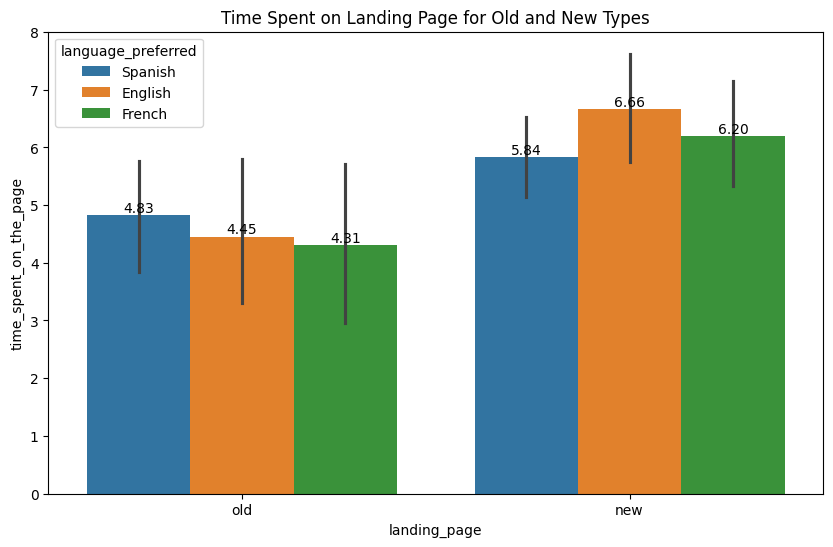

In [ ]:
# Plotting the Graph for Time Spent on Landing Page for Old and New Types of Landing Page.
plt.figure(figsize=(10,6))
ax = sns.barplot(data=enews_1, x='landing_page', y='time_spent_on_the_page', hue='language_preferred');
plt.title('Time Spent on Landing Page for Old and New Types');

# Add exact values on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.show()

1) Users from all the three languages prefer new landing page as the time spent on new landing page is higher in comparison to old landing page.

2) For New landing Page among three languages, maximum mean time spent on the page is from English Language which is 6.66 minutes.

3) For Old landing Page among three languages, maximum mean time spent on the page is from Spanish Language which is 4.83 minutes.

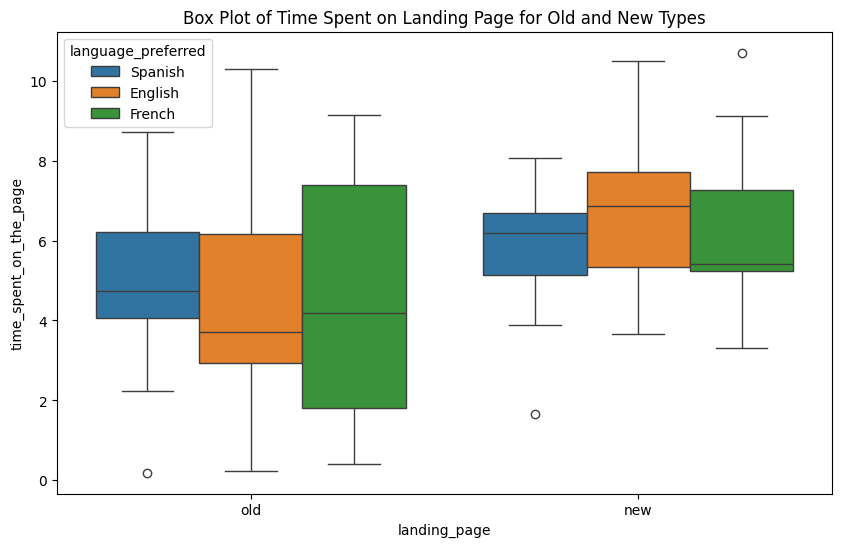

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=enews_1,x='landing_page',y='time_spent_on_the_page', hue='language_preferred');
plt.title('Box Plot of Time Spent on Landing Page for Old and New Types');
plt.show()

1) The Box Plot of landing Page with time spent and Language preferred is displayed.

2) The range of time spent for Spanish Language is lowest in both the cases for old and new.

3) Outliers in Old and New are visible for Spanish Language on the lower side.

4) Outlier in Old for Spanish Language is the least time spent for all the languages for both the cases.

5) The Outlier on New Landing Page for French Language is the maximum time spent on landing page.

6) The range of time spent on landing is maximum for English in both the cases, as the boxplot is widely spread along the Y axis.

Time Spent on the page v/s Landing Page (Old v/s New) Hue as Group

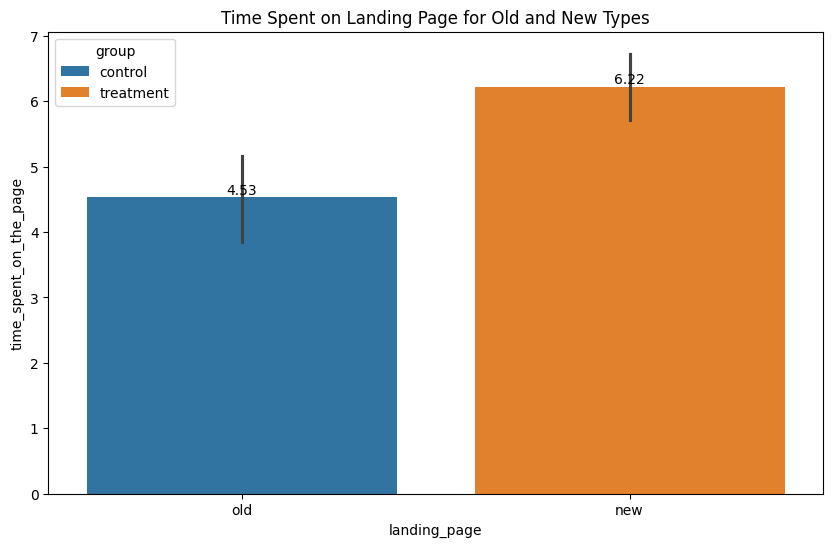

In [ ]:
# Plotting the Graph for Time Spent on Landing Page for Old and New Types of Landing Page.
plt.figure(figsize=(10,6))
ax = sns.barplot(data=enews_1, x='landing_page', y='time_spent_on_the_page', hue='group');
plt.title('Time Spent on Landing Page for Old and New Types');

# Add exact values on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.show()

The mean time spent for Old Page is lower to the New Page.

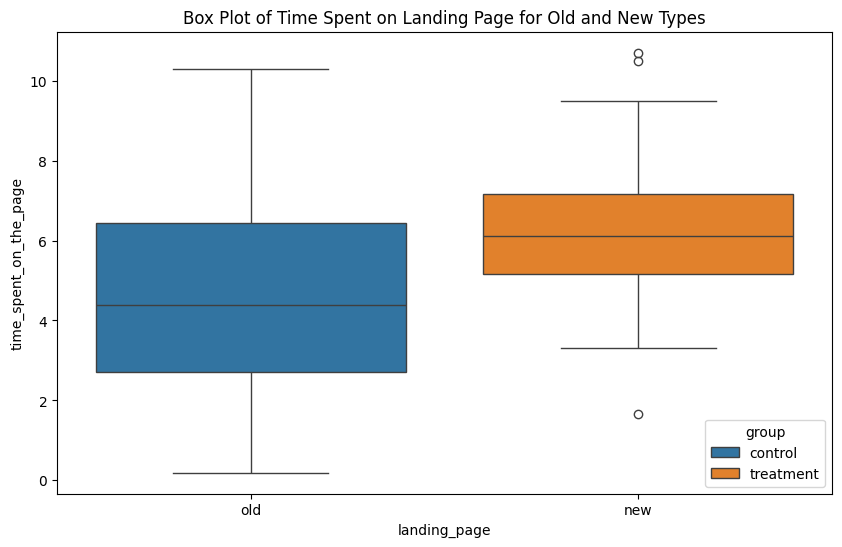

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=enews_1,x='landing_page',y='time_spent_on_the_page', hue='group');
plt.title('Box Plot of Time Spent on Landing Page for Old and New Types');
plt.show()

1) As the Box Plot for Treatment/New Page Group is narrow due to which we can observe outliers at both the end. 2 beyond 75%quartile and 1 below 25%quartile.

2) Despite the outlier on the lower side of treatment group value of lower outlier is more than lowest point of the control group/ old landing page.



Time Spent on the page v/s Landing Page (Old v/s New) Hue as converted

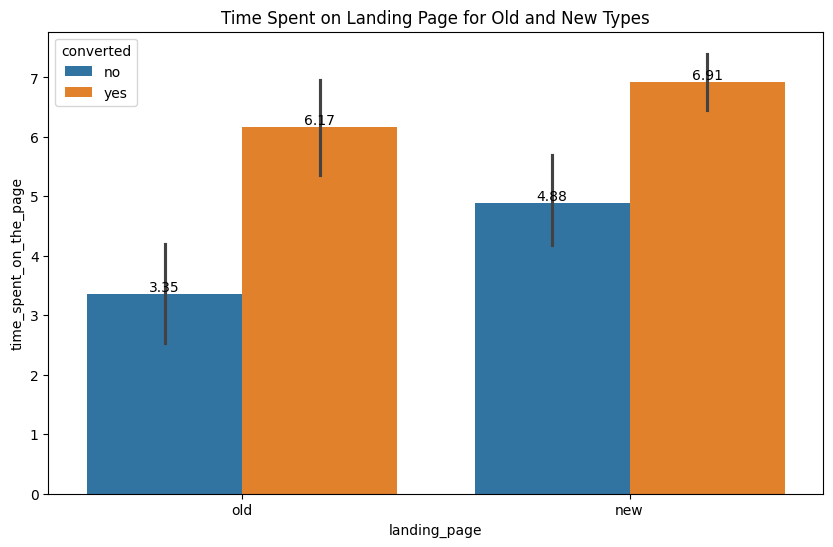

In [ ]:
# Plotting the Graph for Time Spent on Landing Page for Old and New Types of Landing Page.
plt.figure(figsize=(10,6))
ax = sns.barplot(data=enews_1, x='landing_page', y='time_spent_on_the_page', hue='converted');
plt.title('Time Spent on Landing Page for Old and New Types');

# Add exact values on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.show()

1) Users of Old landing Page who got converted have mean time spent of 6.17 minutes, whereas who did'nt convert have 3.35 minutes as mean time spent.

2) For New Landing Page who got converted have mean time spent of 6.91 minutes with respect to those who did'nt convert have mean time of 4.88 minutes.

3) This clearly states, lower the mean time spent on landing page higheris the possibility of them not converting.

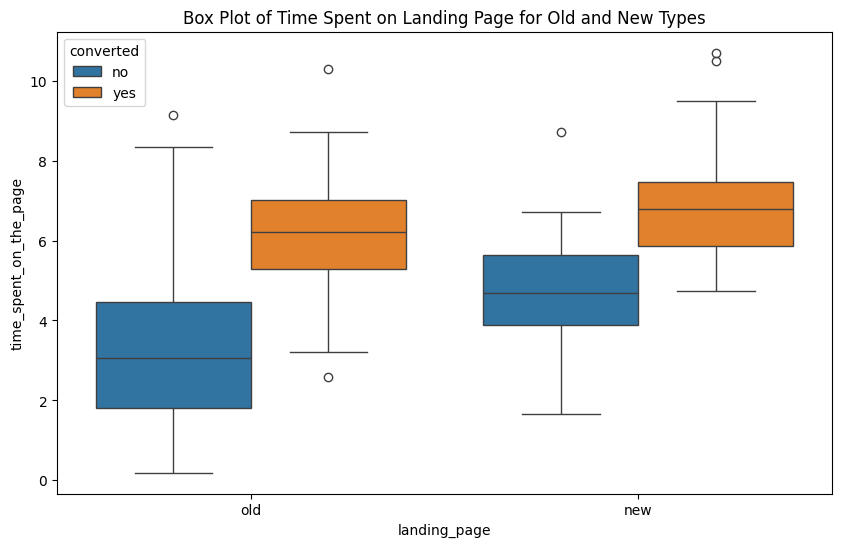

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=enews_1,x='landing_page',y='time_spent_on_the_page', hue='converted');
plt.title('Box Plot of Time Spent on Landing Page for Old and New Types');
plt.show()

1) As it was visible from Barplot, same  is dipcted in the box plot.

2) The boxplot of users who were not converted for Old Landing Page have broader box plot with upper tail crossing 8 minutes and an ouitlier whereas lower tail is the lowest time taken by a user as per the data.

3) Those who got converted have a narrow box in comparison to not converted ones for Old Landing Page. Here also there are few outliers are both  the end. But the spread of time spent is not that large.

4) In case of New Landing Page the box plot for both converted and not converted is almost the same, with some difference.

5) Not converted have large tail towards lower end stating users are not interested, and mean time spent is also between 4 and 6 minutes.

6) For converted the tail is larger at top end which indicates user who give more time are getting converted. Few outliers can be observed on the higher end of the plot.

### **Question Answers**

### **Ques 1:Do the users spend more time on the new landing page than on the existing landing page?**

<Figure size 1000x600 with 0 Axes>

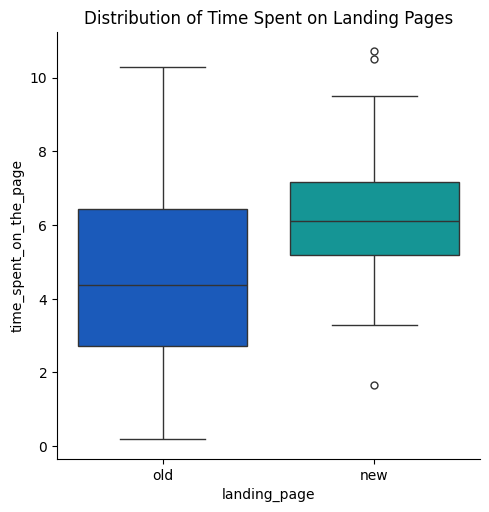

In [ ]:
# Before moving to the Statistical Tests, first Visualization can be made for the above question.
# Identify distribution of the time spent by users on New and Old Landing Page.

plt.figure(figsize=(10,6))
sns.catplot(data=enews_1,x='landing_page',y='time_spent_on_the_page',kind='box',palette='winter',hue='landing_page',errorbar=None);
plt.title('Distribution of Time Spent on Landing Pages');
plt.show();

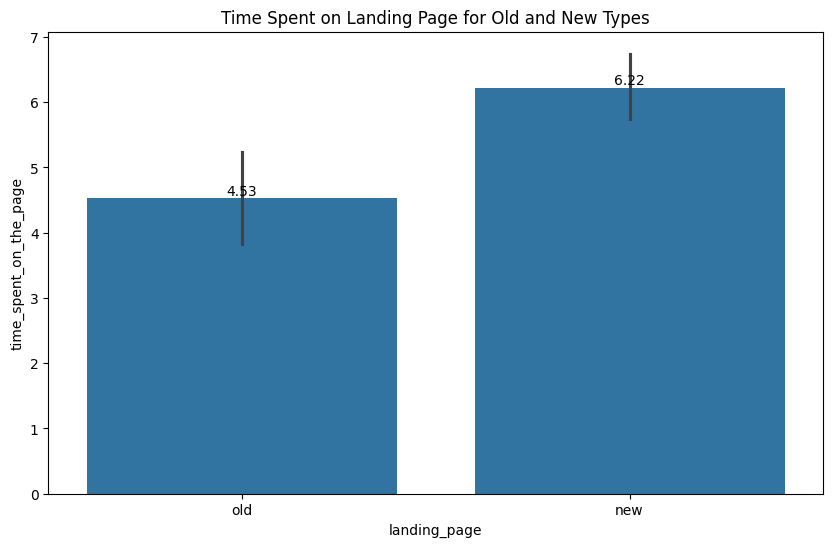

In [ ]:
# Identifying the time spent on Landing Pages Old and New
# Plotting the Graph for Time Spent on Landing Page for Old and New Types of Landing Page.
plt.figure(figsize=(10,6))
ax = sns.barplot(data=enews_1, x='landing_page', y='time_spent_on_the_page');
plt.title('Time Spent on Landing Page for Old and New Types');

# Add exact values on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.show()

**OBSERVATIONS**

1) As per the plots, it is evident that Users who were provided new landing page spend more time on it.

2) For new page mean time spent is 6.22 minutes, whereas for old it is 4.53 minutes.

3) The range of time spent on Old Landing Page is from 0.19 minutes the lowest reading time to just above 10 minutes,  whereas for New it ranges from just below 2 minutes to above 10 minutes, with maximum time spent on a page also lies under New Landing Page.


**Testing the query with the Statistical Methods**

### **STEP 1: Define the Null and Alternate Hypothesis**

**$H_0$ (Null Hypothesis)**: $\mu_{1} = \mu_{2}$ (The Mean Time Spent on the Landing Page is same for Old and New Landing Page)

**$H_a$ (Alternate Hypothesis)**: $\mu_{2} > \mu_{1}$ (The Mean Time Spent on the Landing Page is greater for the New Landing Page than the Old Landing Page)

$\mu_{1},  \mu_{2}$ are the mean time spent on the Old and New Landing Page respectively.


### **STEP 2: Selection of the Appropriate Test**

1) We have two different means of 2 different populations.
2) Standard Deviation of the Populations are not known.
3) We have to find out, mean time spent on New landing page is more than old or not.
4) The Populations are Independent of each other.

With all the above conditions, the best possible test to be selected and conducted should be **One Tail T Test**

In [ ]:
# Calculating the mean time spent and Standard Deviation for the Sample of Old and New Landing Page.
# Returns the mean of time spent on different landing pages
print('Mean time spent on the new page : ',round(enews_1.groupby(['landing_page'])['time_spent_on_the_page'].mean()['new'],2))
print('Mean time spent on the old page : ',round(enews_1.groupby(['landing_page'])['time_spent_on_the_page'].mean()['old'],2))
# Returns the standard deviation of time spent on different landing pages
print('Standard deviation of time spent on the new page : ', round(enews_1.groupby(['landing_page'])['time_spent_on_the_page'].std()['new'],2))
print('Standard deviation of time spent on the old page : ', round(enews_1.groupby(['landing_page'])['time_spent_on_the_page'].std()['old'],2))

Mean time spent on the new page :  6.22
Mean time spent on the old page :  4.53
Standard deviation of time spent on the new page :  1.82
Standard deviation of time spent on the old page :  2.58


### **STEP 3: DEFINING THE SIGNIFICANCE LEVEL ($\alpha$)**

As given in the Problem Statement Significance Level $\alpha$ = 5%

### **STEP 4: COLLECTION AND PREPARATION OF THE DATA**



In [ ]:
# Seggregating the Data on the Basis on New and Old Landing Page.

# Sorting the Data for time spent on Old Landing Page
old_landing_page_time = enews_1[enews_1['landing_page'] == 'old']['time_spent_on_the_page']

# Sorting the Data for the time spent on New Landing Page
new_landing_page_time = enews_1[enews_1['landing_page'] == 'new']['time_spent_on_the_page']

### **STEP 5: CALCULATION OF p-Value**


In [ ]:
# Importing the required function from Scipy Stats Library
from scipy.stats import ttest_ind

# Finding p-Value
test_stat, p_value= ttest_ind(new_landing_page_time, old_landing_page_time,equal_var=False,alternative='greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### **STEP 6: COMPARISON OF THE p Value with $\alpha$**

In [ ]:
  # Comparing and displaying the result on the basis of condition satistfied.
  if p_value < 0.05:
   print(f'As the p-value {p_value} is less than siginificance level, we reject null hypothesis')
  else:
    print(f'As the p-value {p_value} is  greater than significance level, we fail to reject null hypothesis')


As the p-value 0.0001392381225166549 is less than siginificance level, we reject null hypothesis


### **STEP 7: INFERENCES FROM THE RESULTS**

1) With the p-value of 0.0001, which is very less as compared to significane level 0.05, it can be concluded that **Null Hypothesis should be Rejected**

2) At 5% significance level and with statistical evidence along with graphical plots, it can be deduced that **The Mean Time Spent on the Landing Page is greater for the New Landing Page than the Old Landing Page**

### **Ques 2: Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?**

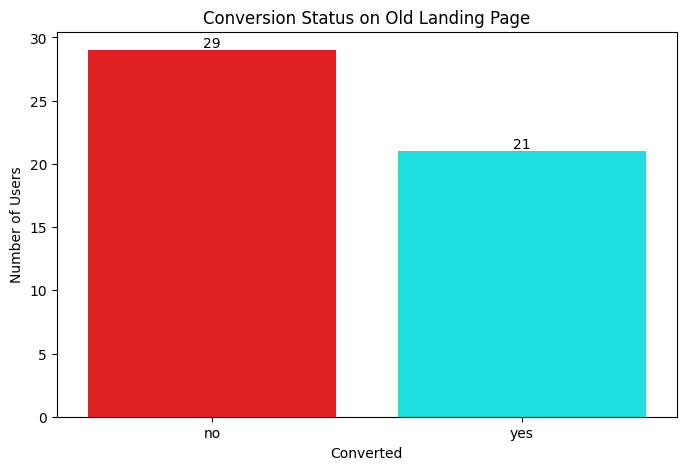

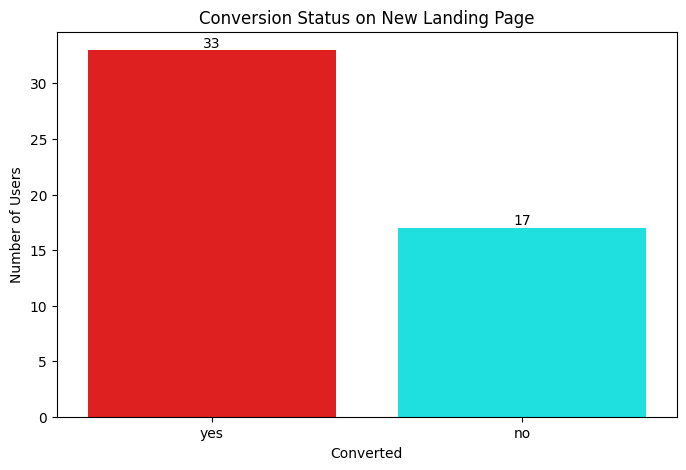

In [ ]:
# Before moving to Statistical Tests, Visualization can be made to understand more about the Data.
# Filter data for old landing page
old_page_enews_1 = enews_1[enews_1['landing_page'] == 'old']

# Create a count plot for converted status on the old landing page
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=old_page_enews_1, x='converted', hue='converted', palette=['red', 'cyan'], legend=False)
plt.title('Conversion Status on Old Landing Page')
plt.xlabel('Converted')
plt.ylabel('Number of Users')

# Add counts on top of the bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()

# Filter data for new landing page
new_page_enews_1 = enews_1[enews_1['landing_page'] == 'new']

# Create a count plot for converted status on the new landing page
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=new_page_enews_1, x='converted', hue='converted', palette=['red', 'cyan'], legend=False)
plt.title('Conversion Status on New Landing Page')
plt.xlabel('Converted')
plt.ylabel('Number of Users')

# Add counts on top of the bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()

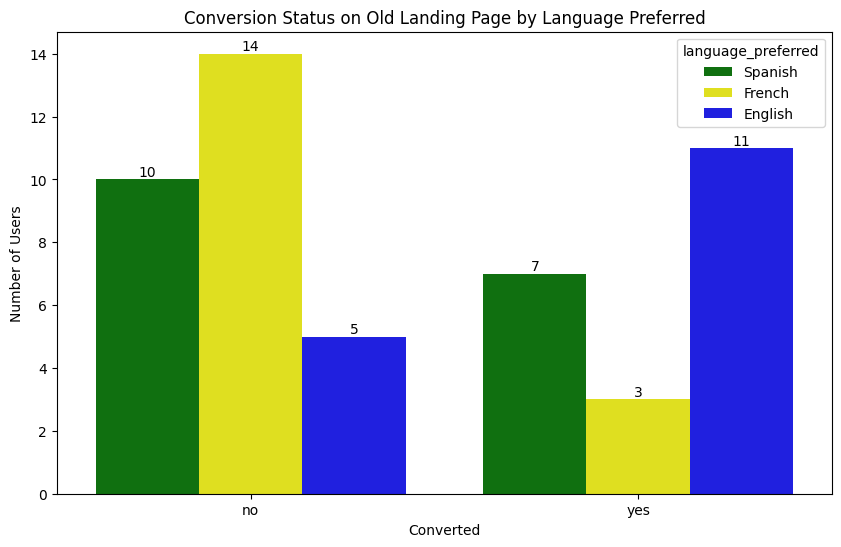

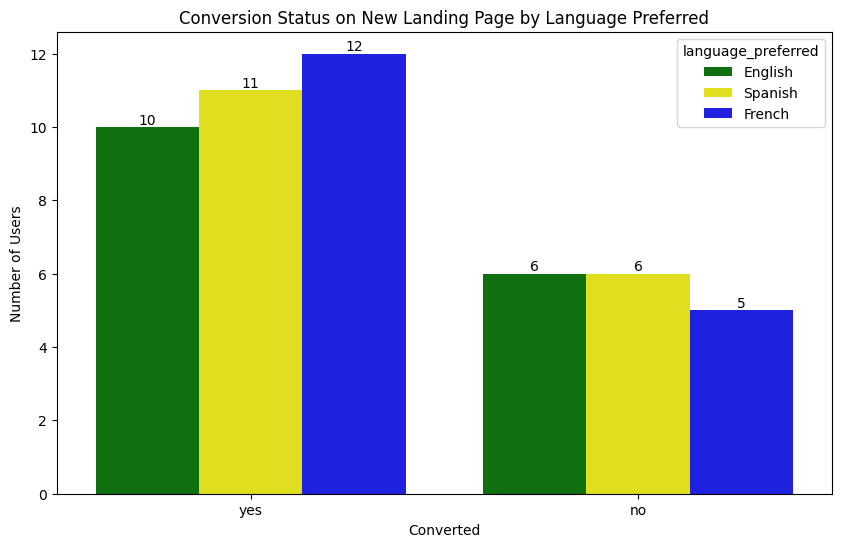

In [ ]:
# Filter data for old landing page
old_page_enews_1 = enews_1[enews_1['landing_page'] == 'old']

# Create a count plot for converted status on the old landing page with language preference
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=old_page_enews_1, x='converted', hue='language_preferred', palette=['green', 'yellow', 'blue'])
plt.title('Conversion Status on Old Landing Page by Language Preferred')
plt.xlabel('Converted')
plt.ylabel('Number of Users')

# Add counts on top of the bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()

# Filter data for new landing page
new_page_enews_1 = enews_1[enews_1['landing_page'] == 'new']

# Create a count plot for converted status on the new landing page with language preference
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=new_page_enews_1, x='converted', hue='language_preferred', palette=['green', 'yellow', 'blue'])
plt.title('Conversion Status on New Landing Page by Language Preferred')
plt.xlabel('Converted')
plt.ylabel('Number of Users')

# Add counts on top of the bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()

1) From the Graphical Plots, it can be seen more users from New Landing Page tend to get converted than for Old Landing Page.

2) As per the plots out of 50 Users from New Landing Page 33 got converted which is 0.66 or 66%

3) For Old Landing page out of 50 users, 21 got converted which is 0.42 or 42%.

4) When the graph was plotted with Language Preference for those who got converted for Old and New Landing Page it was found Users for New Landing Page have no criteria based on language as most of them got converted.

5) For Old Landing Page apart from English Language the proportion of users getting converted is lower than those getting not converted.

**Testing the query with the Statistical Methods**

### **STEP 1: Define the Null and Alternate Hypothesis**

**$H_0$ (Null Hypothesis)**: The proportion of users visiting landing page and gets converted for new page is equal to old page.

**$H_a$ (Alternate Hypothesis)**: The proportion of users visiting landing page and gets converted for new page is greater than old page.

Assuming p1 and p2 are the proportion of user getting converted for Old and New Page respectively.

$H_0$: p1=p2

$H_a$: p1<p2

### **STEP 2: Selection of the Appropriate Test**

Its a One Tailed Test with 2 independent populations and checking for their proportions.

For Analysis of Proportions and 2 Independent Population **2 Sample Z Test** should be considered for testing the Hypothesis.

**Checking for the Assumptions of Z test are satisfied or not.**

1) Its a Binomial Distribution: **Yes, as the user will either become subscriber or not.**

2) Random Sampling from Population: **Yes, as stated in Problem Statement the sampling is done randomly.**

3) Can the Binomial Distribution be approximated to Normal Distribution?
   
   This has to be checked whether np and n(1-p)>= 10. If the value is satisfy the relation then this Binomial Distribution can be approximated as Normal Distribution.

For 1st Sample Proportion

   n1= 50 (100 users divided into 2 equal groups)
  p1= 21 ( Proportion of users who converted for old landing page)

  n1p1>=10
  
  50.21/50=21>10

  n1(1-p1)>=10

  50.50-21/50=29>10

  For 2nd Sample Proportion

   n2= 50 (100 users divided into 2 equal groups)
  p2= 33 ( Proportion of users who converted for new landing page)

  n2p2>=10
  
  50.33/50=33>10

  n2(1-p2)>=10

  50.50-33/50=17>10

**Since The assumptions satisfies for both the sample proportions we can approximated this Binomial Distribution as Normal Distribution.**

4) Population is Independent of each Other: **Yes, as stated in Problem Statement, both the Populations are Independent of each other.**


### **STEP 3: DEFINING THE SIGNIFICANCE LEVEL ($\alpha$)**

As given in the Problem Statement Significance Level $\alpha$ = 5%

**STEP 4: COLLECTION AND PREPARATION OF THE DATA**

In [ ]:
# Total users for old and new pages
total_users_old = enews_1[enews_1['landing_page'] == 'old'].shape[0]
total_users_new = enews_1[enews_1['landing_page'] == 'new'].shape[0]

# Users converted on old and new pages
converted_users_old = enews_1[(enews_1['landing_page'] == 'old') & (enews_1['converted'] == 'yes')].shape[0]
converted_users_new = enews_1[(enews_1['landing_page'] == 'new') & (enews_1['converted'] == 'yes')].shape[0]

print(f"Total users on old landing page: {total_users_old}")
print(f"Converted users on old landing page: {converted_users_old}")
print(f"Total users on new landing page: {total_users_new}")
print(f"Converted users on new landing page: {converted_users_new}")

Total users on old landing page: 50
Converted users on old landing page: 21
Total users on new landing page: 50
Converted users on new landing page: 33


In [ ]:
# Identifying the Proportion of Users who got converted for Old and New Page.
print('Proportion of users who converted for Old Landing Page=', round(converted_users_old/total_users_old,2))
print('Proportion of users who converted for New Landing Page=', round(converted_users_new/total_users_new,2))


Proportion of users who converted for Old Landing Page= 0.42
Proportion of users who converted for New Landing Page= 0.66


### **STEP 5: CALCULATION OF p-Value**

In [ ]:
from statsmodels.stats.proportion import proportions_ztest
z_stat,p_value=proportions_ztest([converted_users_new,converted_users_old],[total_users_new,total_users_old],alternative='larger')
# print the p-value
print('The p-value is', p_value)

The p-value is 0.008026308204056278


### **STEP 6: COMPARISON OF THE p Value with $\alpha$**

In [ ]:
  # Comparing and displaying the result on the basis of condition satistfied.
  if p_value < 0.05:
   print(f'As the p-value {p_value} is less than siginificance level, we reject null hypothesis')
  else:
    print(f'As the p-value {p_value} is  greater than significance level, we fail to reject null hypothesis')

As the p-value 0.008026308204056278 is less than siginificance level, we reject null hypothesis


### **STEP 7: INFERENCES FROM THE RESULTS**

1) The p-value is 0.008 which is much less than significance level 0.05, we **Reject the Null Hypothesis.**

2) As per the significance level of 5%, the p-value came very less, it can be concluded from Statistical summary, and analysis of Graphical Plots; **The proportion of users visiting landing page and gets converted for new page is greater than old page.**

### **Ques 3: Does the converted status depend on the preferred language?**

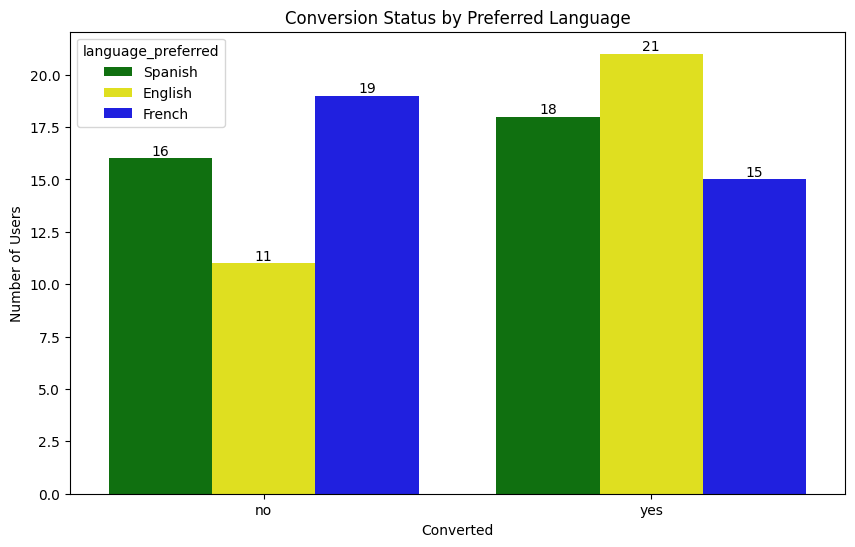

In [ ]:
# Before we move ahead with Statistical Analysis, lets have a look at the Graphical representation of the Data.
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=enews_1, x='converted', hue='language_preferred', palette=['green', 'yellow', 'blue'])
plt.title('Conversion Status by Preferred Language')
plt.xlabel('Converted')
plt.ylabel('Number of Users')

# Add counts on top of the bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()

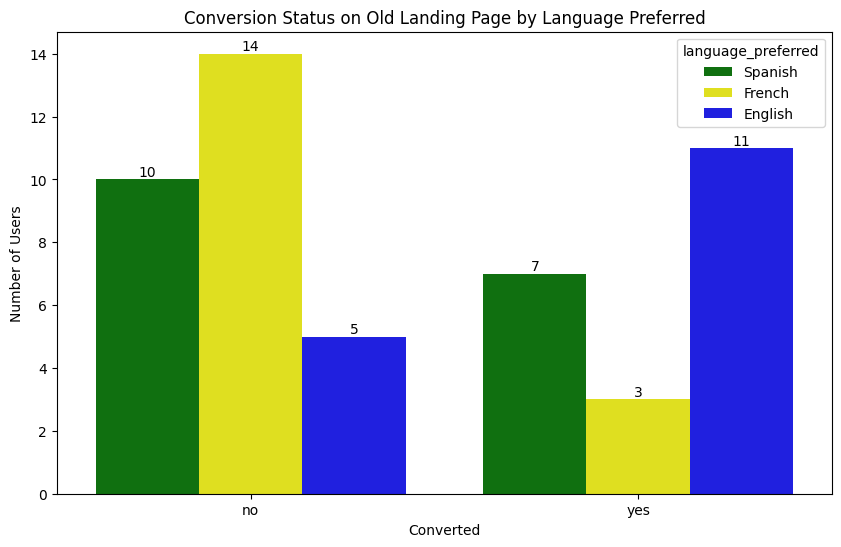

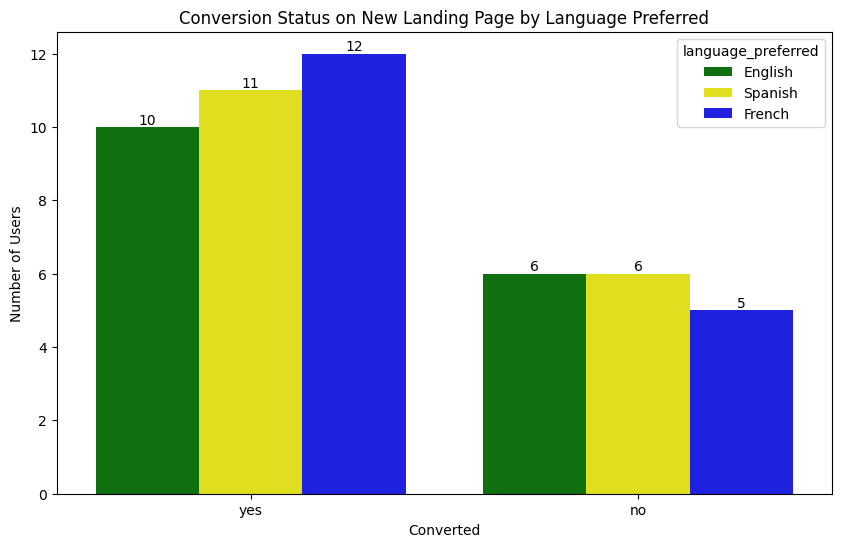

In [ ]:
# Filter data for old landing page
old_page_enews_1 = enews_1[enews_1['landing_page'] == 'old']

# Create a count plot for converted status on the old landing page by language preferred
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=old_page_enews_1, x='converted', hue='language_preferred', palette=['green', 'yellow', 'blue'])
plt.title('Conversion Status on Old Landing Page by Language Preferred')
plt.xlabel('Converted')
plt.ylabel('Number of Users')

# Add counts on top of the bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()

# Filter data for new landing page
new_page_enews_1 = enews_1[enews_1['landing_page'] == 'new']

# Create a count plot for converted status on the new landing page by language preferred
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=new_page_enews_1, x='converted', hue='language_preferred', palette=['green', 'yellow', 'blue'])
plt.title('Conversion Status on New Landing Page by Language Preferred')
plt.xlabel('Converted')
plt.ylabel('Number of Users')

# Add counts on top of the bars
for container in ax.containers:
    ax.bar_label(container)

plt.show()

1) From graphical plots, it can be found that users got converted for all the three languagesis 54% and for not getting converted is 46%, which is a small difference to conclude conversion is based on language preference.

2) For Old Landing Page when graph is plotted for conversion basedon language preference it was found 29 users were not converted which is 58% of total users of control group, whereas who got converted are 21 which is 42%. Again not a very big difference to come to any conclusion.

3) For New Landing Page when graph is plotted for conversion basedon language preference it was found 33 users were not converted which is 66% of total users of control group, whereas who got converted are 17 which is 34%. Here a decision can be made, but cumutalively its not possible to conclude, conversion status is depended on Language Preference.

### **STEP 1: Define the Null and Alternate Hypothesis**

**$H_0$ (Null Hypothesis)**: The conversion status is independent of Langauage Preference.

**$H_a$ (Alternate Hypothesis)**: The conversion status is dependent on Language Preference.

### **STEP 2: Selection of the Appropriate Test**

As this Problem is based on the analysis of conversion with respect to Language Preference which are 2 Categorical Features.

Chi Square test will be the best suited Test for this Analysis.

**Checking for the Assumptions of Chi Square test are satisfied or not.**

1) Are the Two variables to be tested Categorical: **Yes, The two Varibales are Categorical.**

2) Expected value of the number of sample observations in each level of the variable is at least 5: **Yes, The number of Sample Observations on each varibale is greater than 5.**

3) Random Sampling from the Population:**Yes, as per the problem statement, all the samples are collected in simple random manner.**

### **STEP 3: DEFINING THE SIGNIFICANCE LEVEL ($\alpha$)**

As given in the Problem Statement Significance Level $\alpha$ = 5%

### **STEP 4: COLLECTION AND PREPARATION OF THE DATA**

In [ ]:
# Create a contingency table of converted status and language preferred
contingency_table = pd.crosstab(enews_1['converted'], enews_1['language_preferred'])

# Display the contingency table
display(contingency_table)

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### **STEP 5: CALCULATION OF p-Value**

In [ ]:
from scipy.stats import chi2_contingency

# Make sure to run the previous cell to create the contingency_table

# Perform the chi-squared test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the p-value
print('The p-value for the chi-squared test is:', p_value)

The p-value for the chi-squared test is: 0.21298887487543447


### **STEP 6: COMPARISON OF THE p Value with $\alpha$**

In [ ]:
  # Comparing and displaying the result on the basis of condition satistfied.
  if p_value < 0.05:
   print(f'As the p-value {p_value} is less than siginificance level, we reject null hypothesis')
  else:
    print(f'As the p-value {p_value} is  greater than significance level, we fail to reject null hypothesis')

As the p-value 0.21298887487543447 is  greater than significance level, we fail to reject null hypothesis


### **STEP 7: INFERENCES FROM THE RESULTS**

1) The p-value is 0.2129 which is higher than significance level 0.05, we **Fail to Reject the Null Hypothesis.**

2) As per the significance level of 5%, the p-value came high, it can be concluded from Statistical summary, and analysis of Graphical Plots; **The conversion status is independent of Langauage Preference.**

### **Ques 4: Is the time spent on the new page the same for the different language users?**

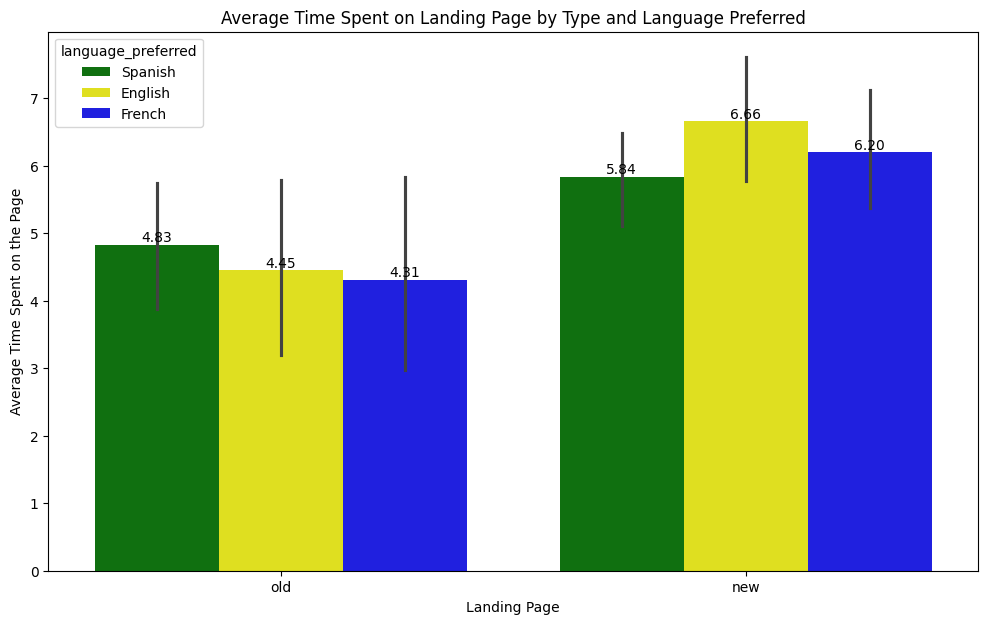

In [ ]:
# Before proceeding further with Statistical Analysis, lets check with the visualisations.
# Visualizing Time Spent on the Page seggregated by the languages.
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=enews_1, x='landing_page', y='time_spent_on_the_page', hue='language_preferred', palette=['green', 'yellow', 'blue'])
plt.title('Average Time Spent on Landing Page by Type and Language Preferred')
plt.xlabel('Landing Page')
plt.ylabel('Average Time Spent on the Page')

# Add exact values on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.show()

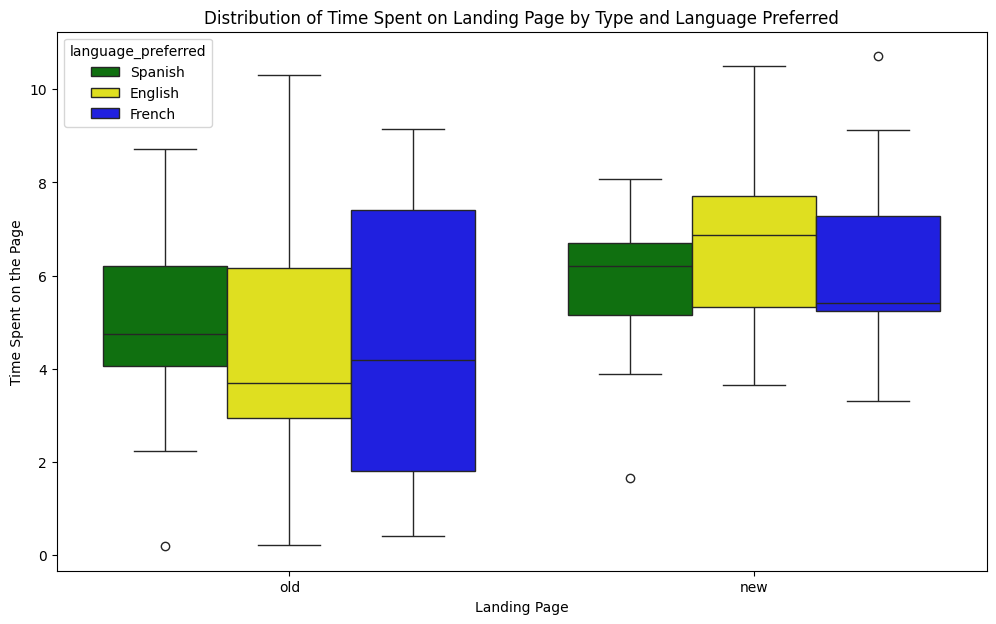

In [ ]:
# Create a box plot of time spent on landing page by landing page type and language preferred
plt.figure(figsize=(12, 7))
sns.boxplot(data=enews_1, x='landing_page', y='time_spent_on_the_page', hue='language_preferred', palette=['green', 'yellow', 'blue'])
plt.title('Distribution of Time Spent on Landing Page by Type and Language Preferred')
plt.xlabel('Landing Page')
plt.ylabel('Time Spent on the Page')
plt.show()

In [ ]:
# Calculate the number of users on old and new landing pages according to language preference
user_counts_by_page_and_language = enews_1.groupby(['landing_page', 'language_preferred']).size().unstack(fill_value=0)

# Display the results
print("Number of users on each landing page by preferred language:")
display(user_counts_by_page_and_language)

Number of users on each landing page by preferred language:


language_preferred,English,French,Spanish
landing_page,,,
new,16,17,17
old,16,17,17


In [ ]:
# Calculate the mean time spent on the landing page for each preferred language and landing page type
mean_time_by_language_and_page = enews_1.groupby(['landing_page', 'language_preferred'])['time_spent_on_the_page'].mean()

# Display the results
print("Mean time spent on landing page by landing page type and preferred language:")
display(mean_time_by_language_and_page)

Mean time spent on landing page by landing page type and preferred language:


landing_page  language_preferred
new           English               6.663750
              French                6.196471
              Spanish               5.835294
old           English               4.454375
              French                4.310000
              Spanish               4.828235
Name: time_spent_on_the_page, dtype: float64

1) From the Graphs it can be found that mean time spent by users for different language varies from 4.31 minutes to 6.66 minutes irrespective of the landing page.

2) For the New Landing Page its always higher than old but is not same for all the 3 languages in both the groups.

3) Highest mean time spent for New Landing page is for English which is    6.66 minutes followed by French 6.19 minutes and at last its Spanish with   5.83 minutes.

4) Highest mean time spent for Old Landing page is for Spanish which is    4.83 minutes followed by English 4.45 minutes and at last its French with  4.31 minutes.

### **STEP 1: Define the Null and Alternate Hypothesis**

**$H_0$ (Null Hypothesis)**: The mean time spent on the new page is same/equal for all the three languages

**$H_a$ (Alternate Hypothesis)**: The mean time spent on the new page for at least one of the three languages is different.

Assuming,

$\mu_1$ is mean time spent on Landing Page of Spanish.

$\mu_2$ is mean time spent on Landing Page of English.

$\mu_3$ is mean time spent on Landing Page of French.








$H_0$:  $\mu_1$=$\mu_2$=$\mu_3$

$H_a$: The mean time spent on the new page for at least one of the three languages is different.

### **STEP 2: Selection of the Appropriate Test**

Since the Test is to test Mean of more than 3 samples of 3 independent population.

The Test to be performed for testing of the Hypothesis is **One Way Anova-F Test**.

Since the Test if Finalized, Let's check whether the provided daqta fulfills the Assumption criteria of One Way Anova-F test.

Assumptions:

1) The Populations are normally distributed: **We have to verify about Normal Distribution/Normality with Shaipro-Wilks Test.**

2) Samples are Independent Samples, Simple Random Samples: **Yes, the Samples are Independent as the Population is independent as per given problem statement and samples are selected simple randomly, as mentioned in the Problem Statement.**

3) Population Variances are Equal: **To check whether the variances of the Population are Equal, we will have to check with Levene's test.**


**If All the above assumptions are satisfied after Shaipro-Wilks and Levene test, One Way Anova-F Test can be adopted for testing the Hypothesis.**

### **STEP 3: DEFINING THE SIGNIFICANCE LEVEL ($\alpha$)**

As given in the Problem Statement Significance Level $\alpha$ = 5%

### **STEP 4: COLLECTION AND PREPARATION OF THE DATA**

Verification of the Normality of the Data using Shaipro-Wilk's Test.

To proceed further we need to test with Hypothesis for Normality.

**$H_0$:** The Time spent on the Landing Page follows Normal Distribution.

**$H_a$:** The Time spent on the Landing Page does not follow Normal Distribution.

In [ ]:
# Testing time spent on landing page follows normality or not.
# Finding p-value and analyzing it with Significance level.

statistics,p_value=stats.shapiro(enews_1[enews_1['landing_page']=='new']['time_spent_on_the_page'])
print('The p-value is',p_value)

The p-value is 0.8040040364746845


The p-value is Greater than the significance level (0.804>0.05), therefore we **fail to Reject the Null Hypothesis**.

**Which implies the Data of time spent on landing page follows Normal Distribution.**

**Verification for the Equality of Variances in Population using Levene's Test**

We will test is again by  formulating the hypothesis.

$H_0$: The Variances of all the Populations are Equal.

$H_a$: The variance of atleast one population is different.

In [ ]:
# Importing the necessary files
from scipy.stats import levene

# Performing Levene's Test.
statistics,p_value=levene(         enews_1[(enews_1['landing_page'] == 'new') & (enews_1['language_preferred'] == 'Spanish')]['time_spent_on_the_page'],
                                   enews_1[(enews_1['landing_page'] == 'new') & (enews_1['language_preferred'] == 'French')]['time_spent_on_the_page'],
                                   enews_1[(enews_1['landing_page'] == 'new') & (enews_1['language_preferred'] == 'English')]['time_spent_on_the_page'])
print('The p-value is',p_value)

The p-value is 0.46711357711340173


The p-value is Greater than the significance level (0.467>0.05), therefore we **fail to Reject the Null Hypothesis**.

**Which implies the Data of time spent on landing page follows Normal Distribution.**

Now we have tested for Assumptions required for One Way Anova-F Test, reiterating the all.

Assumptions:

1) The Populations are normally distributed: **The Distribution of time spent on Landing Page is Normal as tested by Shaipro-Wilk's Test**

2) Samples are Independent Samples, Simple Random Samples: **Yes, the Samples are Independent as the Population is independent as per given problem statement and samples are selected simple randomly, as mentioned in the Problem Statement.**

3) Population Variances are Equal: **The Variances of the Populations are Equal, as tested by Levene's Test.**

### **STEP 5: CALCULATION OF p-Value**

In [ ]:
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(enews_1[(enews_1['landing_page'] == 'new') & (enews_1['language_preferred'] == 'Spanish')]['time_spent_on_the_page'],
                              enews_1[(enews_1['landing_page'] == 'new') & (enews_1['language_preferred'] == 'French')]['time_spent_on_the_page'],
                              enews_1[(enews_1['landing_page'] == 'new') & (enews_1['language_preferred'] == 'English')]['time_spent_on_the_page'])
print('The p-value for the chi-squared test is:', p_value)

The p-value for the chi-squared test is: 0.43204138694325955


### **STEP 6: COMPARISON OF THE p Value with $\alpha$**

In [ ]:
  # Comparing and displaying the result on the basis of condition satistfied.
  if p_value < 0.05:
   print(f'As the p-value {p_value} is less than siginificance level, we reject null hypothesis')
  else:
    print(f'As the p-value {p_value} is  greater than significance level, we fail to reject null hypothesis')

As the p-value 0.43204138694325955 is  greater than significance level, we fail to reject null hypothesis


### **STEP 7: INFERENCES FROM THE RESULTS**

1) The p-value is 0.432 which is higher than significance level 0.05, we **Fail to Reject the Null Hypothesis.**

2) As per the significance level of 5%, the p-value came high, it can be concluded from Statistical summary; **The mean time spent on the new page is same/equal for all the three languages.**

3) At the point it can be seen, Graphical representation/plots were showing the mean time spent on new landing page is not equal for all the languages, but during the Hypothesis Testing it was found that the mean time is equal for all the languages for new landing page.

**CONCLUSION AND RECOMMENDATIONS**

1) **Observations obtained from Graphical Analysis as well as Hypothesis Testing:**

  (i) The average time spent on the landing page and the user's language   preference on reading the landing page is the possible factors influencing the page's visitors to become subscribers.

  (ii) The mean time spent on the new landing page is higher than the old one,regardless of the language preferred by the user.

  (iii) The proportion of users who visit the landing page and get converted to subscribers is higher for the new landing page than the old landing page.

  (iv) There is a significant increase in the conversion rate for Spanish and French users on the new landing page, but the conversion rate for English remains almost the same for both pages.

  (v) The converted status does not depend on the language the users prefer, thus making the average time spent on the landing page a deciding factor for increasing the converted status.

  (vi) The average time spent on the new landing page for all three languages is equal.


2) **Conclusion:**

(i) The Company should proceed further by replacing the Old Landing Page with New Landing Page to acquire new users and expand its Business.

(ii) Time spent on the Landing Page influences the users to become subscriber.

(iii) Language does not play any role in influencing the conversion rate.


3) **Recommendations:**

(i) The main purpose of the company to increase the average time spent on the page as it is the governing factor for converion.

(ii) Landing Page should constitute of major News across the globe but should be short and precise without the complete informations, indulging users to read the full report will tend them to move to specific segments,eventually converting them.

(iii) The Landing Page can be designed as per the demographics of its reach. Identifying the population of the location where users are reading, understanding the language demography of that particular location and providing users to switch to the optional language of that region. This will pull more users and help in the conversion.

(iv) Landing Page should also consist of Images, which will attract the users of the latest or burning issues, overall increasing the impressions and finally leading to conversions.